# Implementation of the Random Forest Classifier
### 1. Import of data
### 2. Split the data into train, valid and test data
### 3. Train the Random Forest Classifier
### 4. Hyperparameter optimization with grid search
### 5. Hyperparameter optimization with randomized search


**1. Import of data**

In [0]:
import pandas as pd
import numpy as np

# Import train_test_split function
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# Doc2vec
# CSVLInk = r'/content/drive/My Drive/Feature_generated_sets/doc2vec/Pretrained_withScore.csv'
# hotelData = pd.read_csv(CSVLInk)

# Bag of Words - TF / TF-IDF
CSVLInk = r'/content/drive/My Drive/Feature_generated_sets/BOW/tfidf_561-woerter.pkl'
# CSVLInk = r'/content/drive/My Drive/Feature_generated_sets/BOW/tf_561-woerter.pkl'
# CSVLInk = r'/content/drive/My Drive/Feature_generated_sets/fast_text/fast_text_nonswr.pkl'
hotelData =pd.DataFrame(np.load(CSVLInk,allow_pickle=True))

# FastText
# CSVLInk = r'/content/drive/My Drive/Feature_generated_sets/BOW/tfidf_561-woerter.pkl'
# review_score = hotelData[300]
# hotelData = hotelData.drop([300], axis=1)
# hotelData["Reviewer_Score"] = pd.Series(review_score)


Mounted at /content/drive


**2. Split the data into train, valid and test data**




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def train_test_valid_split(df,upsampling=True):
    train,test = train_test_split(df,test_size=0.3,stratify=df["Reviewer_Score"], random_state=42)
    test,valid = train_test_split(test,test_size=0.5,stratify=test["Reviewer_Score"], random_state=42)
    #In summary, the following split: 70% training, 15% validation, 15% testing


    unique, counts_train = np.unique(train["Reviewer_Score"], return_counts=True)
    if(upsampling): #Idea: Reduce class 0 to the size of class 1, dupliate samples from class 2 to the size of class 1
        train_0 = train[train["Reviewer_Score"]==0].sample(frac=(counts_train[1]/counts_train[0]), random_state=42)
        train_1 = train[train["Reviewer_Score"]==1]
        train_2 = train[train["Reviewer_Score"]==2].sample(frac=(counts_train[1]/counts_train[2]),replace=True, random_state=42)
        train = train_0.append(train_1).append(train_2)
    unique, counts_train = np.unique(train["Reviewer_Score"], return_counts=True)
    plt.bar(unique, counts_train)
    #print(counts_train)
    
    unique, counts = np.unique(test["Reviewer_Score"], return_counts=True)
    plt.bar(unique, counts)
    #print(counts)

    unique, counts = np.unique(valid["Reviewer_Score"], return_counts=True)
    plt.bar(unique, counts)
    #print(counts)

    plt.title('Class Frequency')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    
    #plt.show()

    return train,valid,test

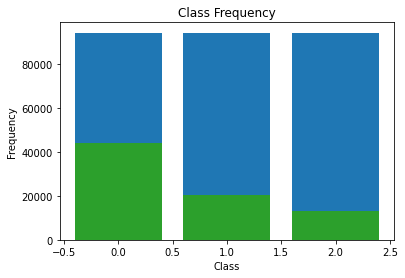

In [0]:
train, valid, test = train_test_valid_split(hotelData,upsampling=True)

y_train = train["Reviewer_Score"]
X_train = train.drop(["Reviewer_Score"], axis=1)

y_test = valid["Reviewer_Score"]
X_test = valid.drop(["Reviewer_Score"], axis=1)

y_testTEST = test["Reviewer_Score"]
X_testTEST = test.drop(["Reviewer_Score"], axis=1)

#To save Ram
train=0
valid=0
test=0
hotelData=0

**3. Train the Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
import time
# n_estimators=150, max_depth=200, min_samples_split=4, random_state=0, n_jobs=-1

firstTime = time.time()
classification = RandomForestClassifier(random_state=0, n_jobs=-1)
classification.fit(X_train, y_train)
y_pred = classification.predict(X_testTEST)
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

--- 266.0816 seconds ---


In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(f1_score(y_testTEST, y_pred, average='macro'))
print(accuracy_score(y_testTEST, y_pred))

0.32822081698989886
0.3935316244619382


**4. Hyperparameter optimization with grid search**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import time

firstTime = time.time()
param_grid = [
{'n_estimators': [150, 200, 300], 'max_depth': [200, 300, 400], 'min_samples_split' :[2, 4]},
]

stratified_3_fold_cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

forest_reg = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(forest_reg, param_grid, cv=stratified_3_fold_cv, scoring='f1_macro', n_jobs =-1)
grid_search.fit(X_train, y_train)
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

In [0]:
# Print results
cvres = grid_search.cv_results_
for f1score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f1score, params)
for accuracy_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(accuracy, f1score, params)
print("\n",grid_search.best_params_)


0.6669132362098454 {'max_depth': 200, 'min_samples_split': 2, 'n_estimators': 150}
0.6674898596573087 {'max_depth': 200, 'min_samples_split': 2, 'n_estimators': 200}
0.668212947245959 {'max_depth': 200, 'min_samples_split': 2, 'n_estimators': 300}
0.6661893515208589 {'max_depth': 200, 'min_samples_split': 4, 'n_estimators': 150}
0.6668036182696846 {'max_depth': 200, 'min_samples_split': 4, 'n_estimators': 200}
0.6682526320709941 {'max_depth': 200, 'min_samples_split': 4, 'n_estimators': 300}
0.6662741395249098 {'max_depth': 300, 'min_samples_split': 2, 'n_estimators': 150}
0.6676296506471283 {'max_depth': 300, 'min_samples_split': 2, 'n_estimators': 200}
0.667840892151959 {'max_depth': 300, 'min_samples_split': 2, 'n_estimators': 300}
0.6658505840814185 {'max_depth': 300, 'min_samples_split': 4, 'n_estimators': 150}
0.6664734598249807 {'max_depth': 300, 'min_samples_split': 4, 'n_estimators': 200}
0.6686280890108504 {'max_depth': 300, 'min_samples_split': 4, 'n_estimators': 300}
0.6669

**5. Hyperparameter optimization with randomized search**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


firstTime = time.time()
param_grid = [
{'n_estimators': [150, 200, 300], 'max_depth': [200, 300, 400], 'min_samples_split' :[2, 4, 6]},
]

stratified_3_fold_cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

forest_reg = RandomForestClassifier(n_jobs=-1)

rd_grid_search = RandomizedSearchCV(forest_reg, param_grid, n_iter=10, cv=5, scoring=('f1_macro'), return_train_score=True)
rd_grid_search.fit(X_train, y_train)
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


--- 8818.1015 seconds ---


In [0]:
# Print results
cvres = rd_grid_search.cv_results_
for f1score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f1score, params)
print("\n",rd_grid_search.best_params_)



0.6794869102103698 {'n_estimators': 400, 'min_samples_split': 4, 'max_depth': 300}

 {'n_estimators': 400, 'min_samples_split': 4, 'max_depth': 300}
